In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset (replace with actual file path)
df = pd.read_csv("Global_Superstore2.csv", encoding="ISO-8859-1")  # or encoding="latin1"

# Data Cleaning
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric columns with median
df.fillna("Unknown", inplace=True)  # Fill categorical columns with 'Unknown'

# Remove duplicates
df.drop_duplicates(inplace=True)

In [3]:
# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition (only for numeric columns)
outlier_condition = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))

# Remove rows with outliers
df_cleaned = df[~outlier_condition.any(axis=1)]

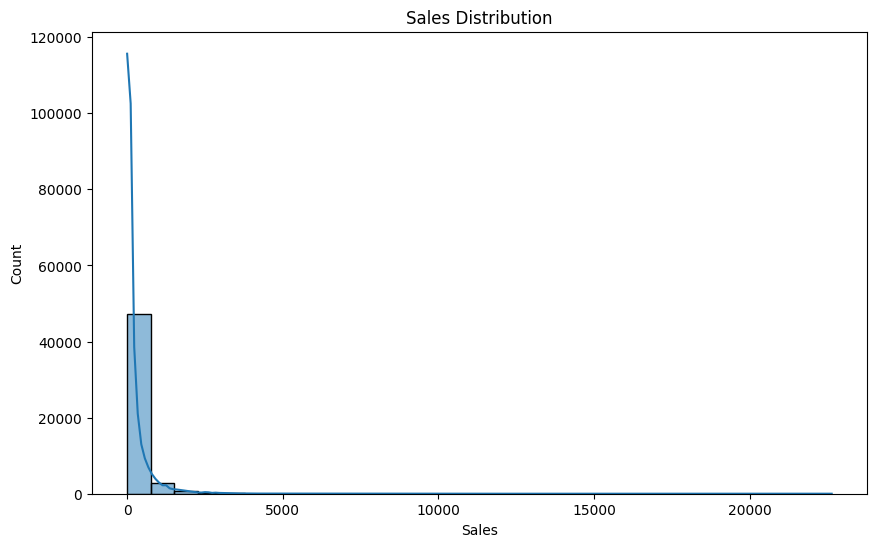

In [5]:
summary_stats = df.describe()
correlation_matrix = df.corr(numeric_only=True)

# Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.show()

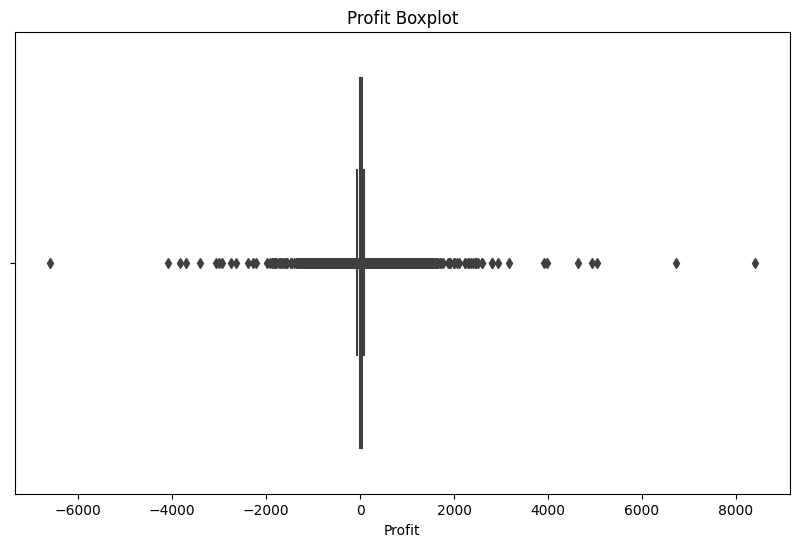

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Profit'])
plt.title('Profit Boxplot')
plt.show()

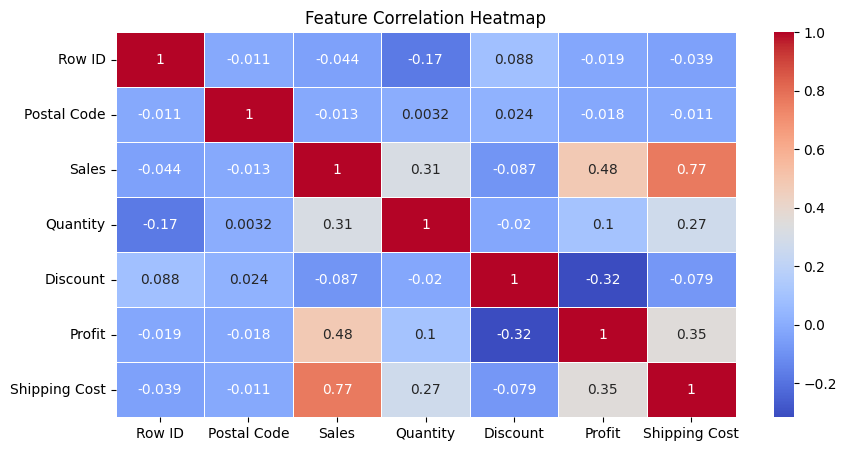

In [7]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
print("Summary Statistics:\n", summary_stats)
print("\nCorrelation Matrix:\n", correlation_matrix)

Summary Statistics:
             Row ID   Postal Code         Sales      Quantity      Discount   
count  51290.00000  51290.000000  51290.000000  51290.000000  51290.000000  \
mean   25645.50000  56188.859037    246.490581      3.476545      0.142908   
std    14806.29199  14161.549620    487.565361      2.278766      0.212280   
min        1.00000   1040.000000      0.444000      1.000000      0.000000   
25%    12823.25000  56430.500000     30.758625      2.000000      0.000000   
50%    25645.50000  56430.500000     85.053000      3.000000      0.000000   
75%    38467.75000  56430.500000    251.053200      5.000000      0.200000   
max    51290.00000  99301.000000  22638.480000     14.000000      0.850000   

             Profit  Shipping Cost  
count  51290.000000   51290.000000  
mean      28.610982      26.375915  
std      174.340972      57.296804  
min    -6599.978000       0.000000  
25%        0.000000       2.610000  
50%        9.240000       7.790000  
75%       36.8100

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
df = pd.read_excel("sales_data.xlsx")
df.head()

,Product,Region,Sales,Profit,Discount,Category,Date
0,Laptop,North,103,133.800859,11.037213,Accessories,2023-01-01
1,Smartwatch,East,537,119.454562,24.089070,Accessories,2023-02-23
2,Smartwatch,West,494,93.871344,14.845108,Accessories,2023-06-28
3,Laptop,West,541,138.356113,18.070559,Electronics,2023-05-10
4,Tablet,North,197,157.043701,9.371258,Electronics,2023-08-08


In [23]:
# Inspect the dataset
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Data Types:\n", df.dtypes)



Dataset Shape: (50, 7)
Missing Values:
 Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64
Data Types:
 Product      object
Region       object
Sales         int64
Profit      float64
Discount    float64
Category     object
Date         object
dtype: object


In [24]:
# Data Cleaning
# Remove duplicates
df.drop_duplicates(inplace=True)

In [25]:
df.isnull().sum()

Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64

In [27]:
df.columns

Index(['Product', 'Region', 'Sales', 'Profit', 'Discount', 'Category', 'Date'], dtype='object')

In [28]:
df.dtypes

Product      object
Region       object
Sales         int64
Profit      float64
Discount    float64
Category     object
Date         object
dtype: object

In [32]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Product             object
Region              object
Sales                int64
Profit             float64
Discount           float64
Category            object
Date        datetime64[ns]
dtype: object

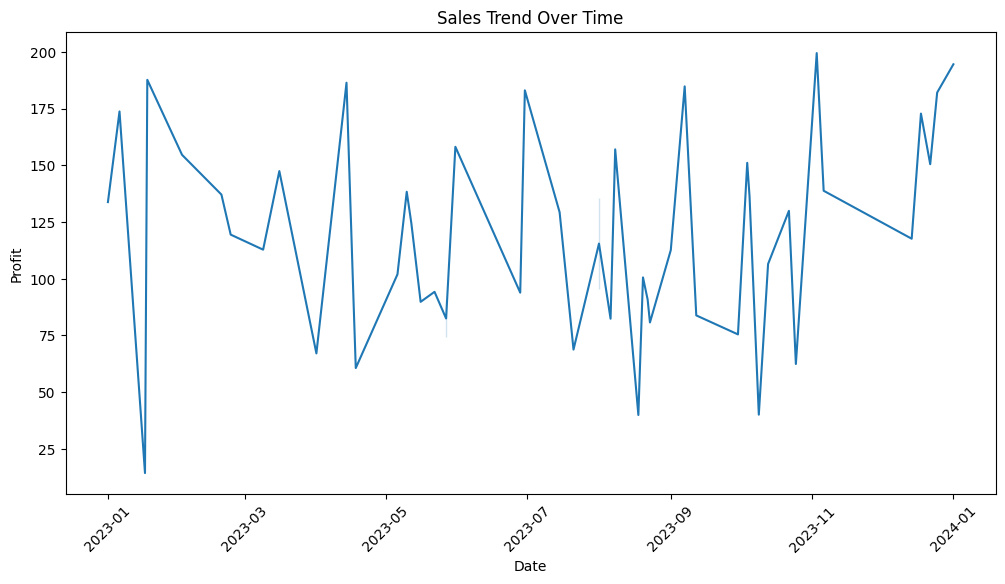

In [33]:
# Exploratory Data Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Profit')
plt.title('Sales Trend Over Time')
plt.xticks(rotation=45)
plt.show()



<Axes: xlabel='Profit', ylabel='Discount'>

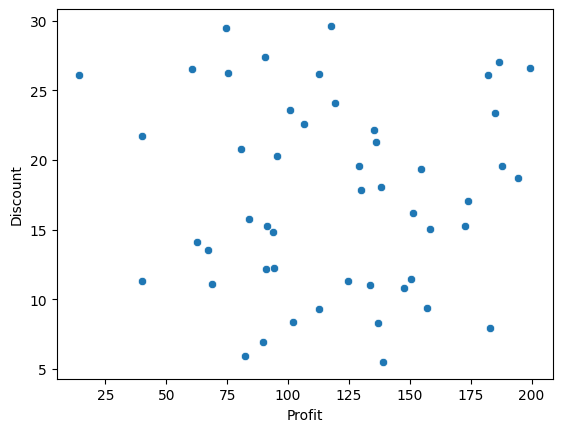

In [38]:

sns.scatterplot(data=df,x=df["Profit"],y=df["Discount"])

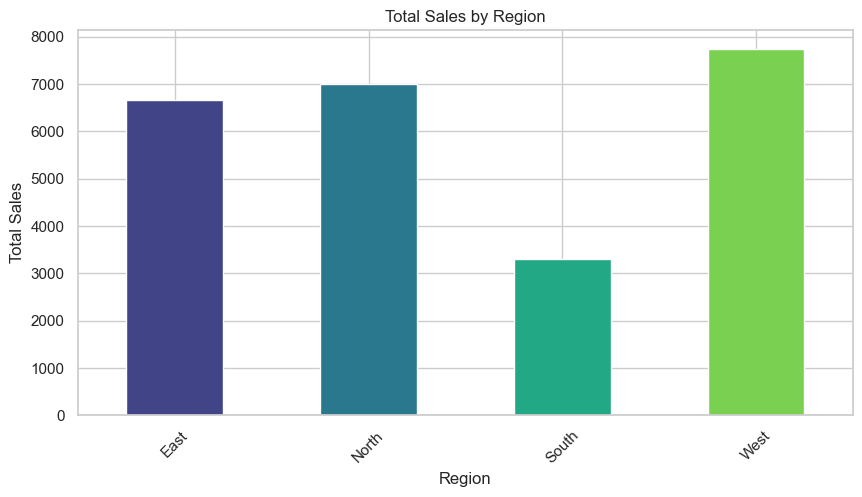

In [40]:

# Set style
sns.set_theme(style="whitegrid")

# Bar plot: Sales by Region
plt.figure(figsize=(10, 5))
df.groupby("Region")["Sales"].sum().plot(kind="bar", color=sns.color_palette("viridis", len(df["Region"].unique())))
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

(array([0, 1]), [Text(0, 0, 'Accessories'), Text(1, 0, 'Electronics')])

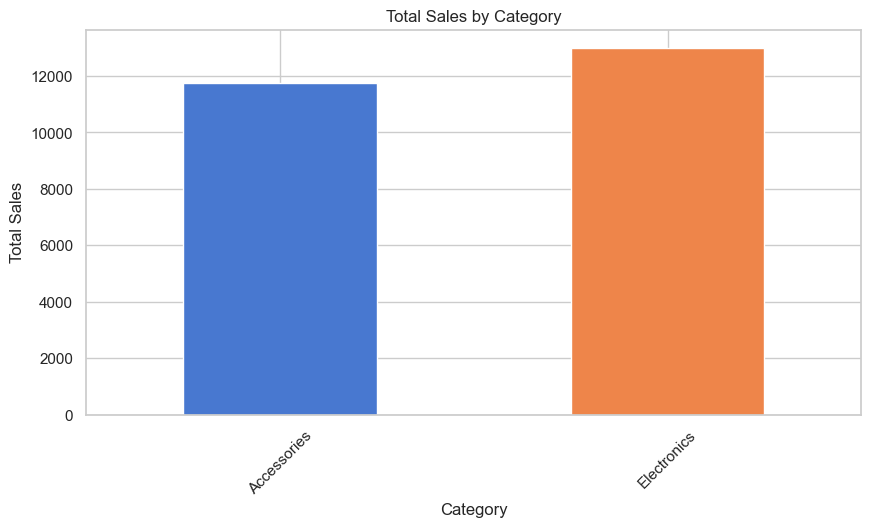

In [45]:
# Bar plot: Sales by Category
plt.figure(figsize=(10, 5))
df.groupby("Category")["Sales"].sum().plot(kind="bar", color=sns.color_palette("muted", len(df["Category"].unique())))
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)


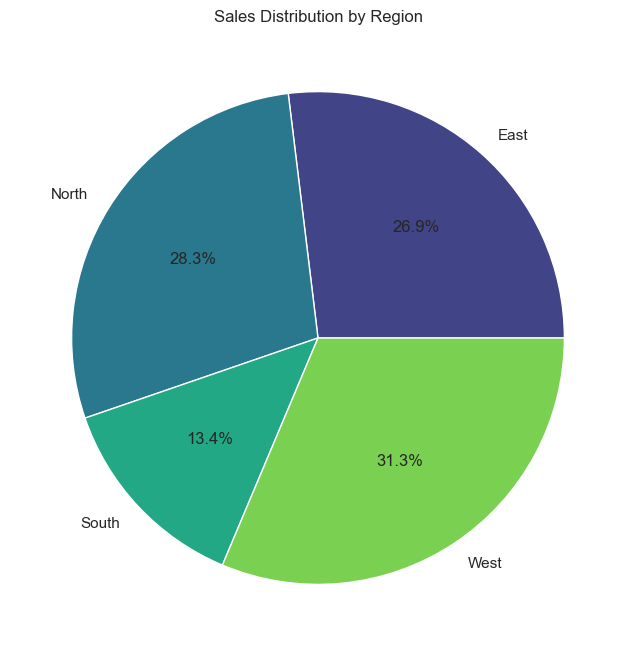

In [42]:

# Pie chart: Sales distribution by Region
plt.figure(figsize=(8, 8))
df.groupby("Region")["Sales"].sum().plot(kind="pie", autopct="%1.1f%%", colors=sns.color_palette("viridis", len(df["Region"].unique())))
plt.title("Sales Distribution by Region")
plt.ylabel("")  # Remove y-label for better visualization
plt.show()

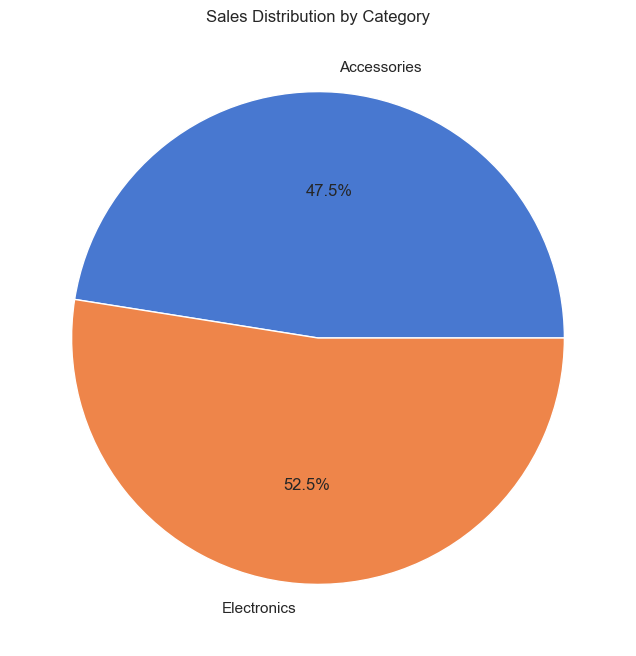

In [43]:
# Pie chart: Sales distribution by Category
plt.figure(figsize=(8, 8))
df.groupby("Category")["Sales"].sum().plot(kind="pie", autopct="%1.1f%%", colors=sns.color_palette("muted", len(df["Category"].unique())))
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.show()

In [44]:
# Selecting features and target variable
X = df[["Profit", "Discount"]]
y = df["Sales"]

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 65194.997149183255
R² Score: -0.0009719868958300015
Coefficients: [-0.00570248  1.38623737]
Intercept: 471.1578635651361
